In [47]:
from torch_geometric.datasets import KarateClub
import numpy as np

In [4]:
# Import dataset from PyTorch Geometric
dataset = KarateClub()
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Graph: {dataset[0]}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4
Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [7]:
data = dataset[0]
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [8]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [9]:
from torch_geometric.utils import to_dense_adj
A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


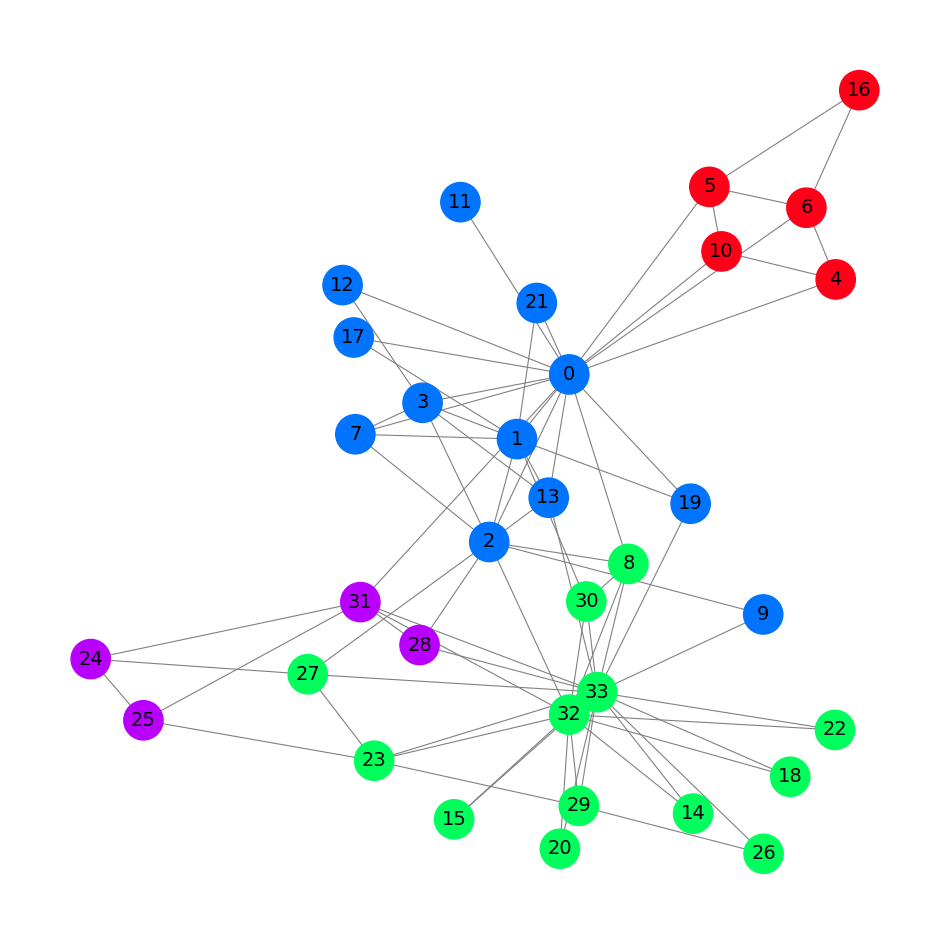

In [15]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

---
# GCN

In [18]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch

In [84]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.gcn1 = GCNConv(3, 3)
        self.out = Linear(3, dataset.num_classes)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        h = self.gcn1(h, edge_index).relu()
        z = self.out(h)
        return h, z
model = GCN()
print(model)
torch.save(model,"test.pt")

GCN(
  (gcn): GCNConv(34, 3)
  (gcn1): GCNConv(3, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [29]:
model = torch.load("./test.pt")
model = model.eval()

x = data.x, 
edge_index = data.edge_index

In [38]:
model
input_names = ['input1', 'input2']
output_names = ['output']

x = torch.randn(4, dataset.num_features, requires_grad=True)  # 4 是节点数量，调整为实际值
edge_index = torch.tensor([[0, 1, 2, 3],
                           [1, 2, 3, 0]], dtype=torch.long)  # 示例边索引

# 定义输入和输出名称
input_names = ['x', 'edge_index']
output_names = ['h', 'z']


In [42]:
torch.onnx.export(model, (x,edge_index), 'best.onnx', input_names=input_names, output_names=output_names, verbose='False')

Exported graph: graph(%x : Float(4, 34, strides=[34, 1], requires_grad=1, device=cpu),
      %edge_index : Long(2, 4, strides=[4, 1], requires_grad=0, device=cpu),
      %gcn.bias : Float(3, strides=[1], requires_grad=1, device=cpu),
      %out.weight : Float(4, 3, strides=[3, 1], requires_grad=1, device=cpu),
      %out.bias : Float(4, strides=[1], requires_grad=1, device=cpu),
      %onnx::MatMul_81 : Float(34, 3, strides=[1, 34], requires_grad=0, device=cpu)):
  %/gcn/Constant_output_0 : Long(device=cpu) = onnx::Constant[value={0}, onnx_name="/gcn/Constant"](), scope: __main__.GCN::/torch_geometric.nn.conv.gcn_conv.GCNConv::gcn
  %/gcn/Gather_output_0 : Long(4, strides=[1], requires_grad=0, device=cpu) = onnx::Gather[axis=0, onnx_name="/gcn/Gather"](%edge_index, %/gcn/Constant_output_0), scope: __main__.GCN::/torch_geometric.nn.conv.gcn_conv.GCNConv::gcn # /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.8/site-packages/torch_geometric/utils/loop.py:623:0
  %/gcn/Constan

In [85]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [86]:
# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []
# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass
    h, z = model(data.x, data.edge_index)
    # Calculate loss function
    loss = criterion(z, data.y)
    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)
    # Compute gradients
    loss.backward()
    # Tune parameters
    optimizer.step()
    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.45 | Acc: 35.29%
Epoch  10 | Loss: 1.23 | Acc: 35.29%
Epoch  20 | Loss: 1.05 | Acc: 44.12%
Epoch  30 | Loss: 0.82 | Acc: 73.53%
Epoch  40 | Loss: 0.59 | Acc: 76.47%
Epoch  50 | Loss: 0.43 | Acc: 91.18%
Epoch  60 | Loss: 0.34 | Acc: 94.12%
Epoch  70 | Loss: 0.28 | Acc: 94.12%
Epoch  80 | Loss: 0.24 | Acc: 94.12%
Epoch  90 | Loss: 0.20 | Acc: 97.06%
Epoch 100 | Loss: 0.17 | Acc: 97.06%
Epoch 110 | Loss: 0.15 | Acc: 97.06%
Epoch 120 | Loss: 0.12 | Acc: 100.00%
Epoch 130 | Loss: 0.10 | Acc: 100.00%
Epoch 140 | Loss: 0.08 | Acc: 100.00%
Epoch 150 | Loss: 0.07 | Acc: 100.00%
Epoch 160 | Loss: 0.05 | Acc: 100.00%
Epoch 170 | Loss: 0.05 | Acc: 100.00%
Epoch 180 | Loss: 0.04 | Acc: 100.00%
Epoch 190 | Loss: 0.03 | Acc: 100.00%
Epoch 200 | Loss: 0.03 | Acc: 100.00%


----
## Vis

In [45]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

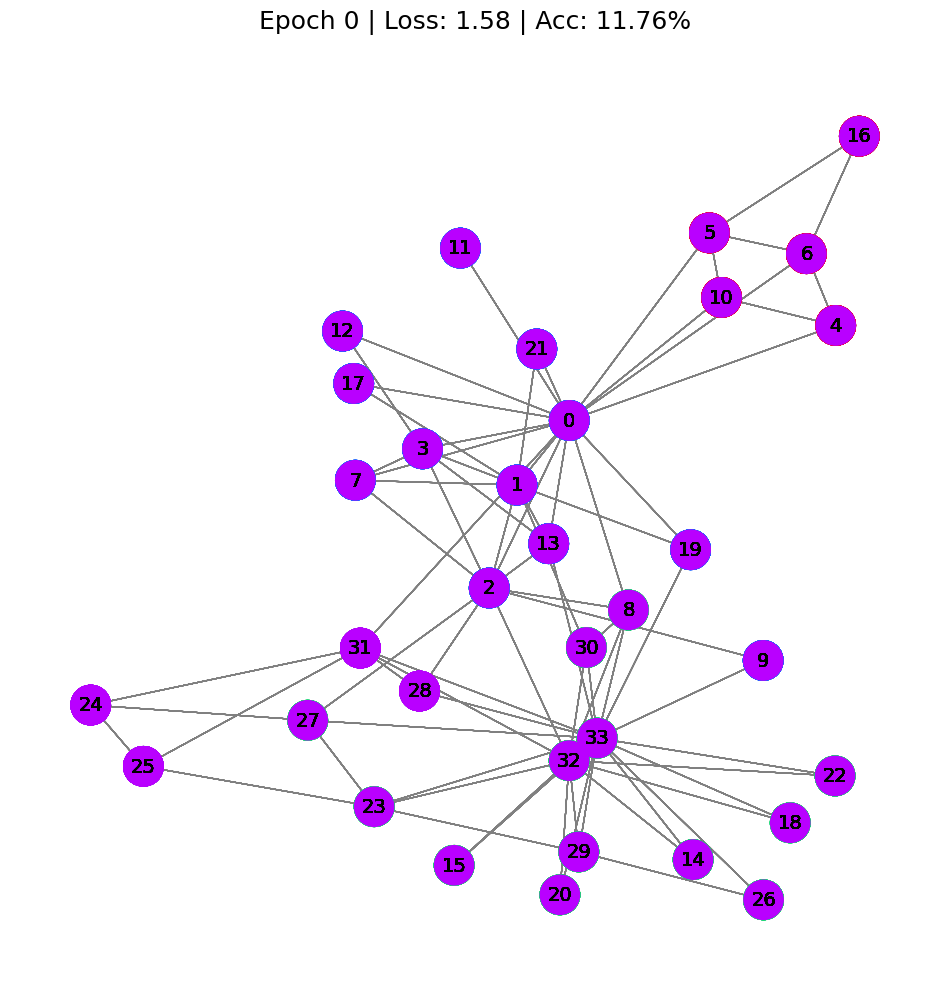

In [48]:
def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

In [50]:
# Print embeddings
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[3.0407e+00, 0.0000e+00, 3.1669e+00],
        [3.4016e+00, 0.0000e+00, 2.4586e+00],
        [2.9695e+00, 4.1306e-01, 2.1806e+00],
        [3.0187e+00, 0.0000e+00, 2.0545e+00],
        [0.0000e+00, 1.8513e-04, 2.9311e+00],
        [0.0000e+00, 0.0000e+00, 3.2495e+00],
        [0.0000e+00, 0.0000e+00, 3.1950e+00],
        [2.4674e+00, 0.0000e+00, 1.8186e+00],
        [1.5682e+00, 1.8117e+00, 2.1820e+00],
        [2.3234e+00, 3.9132e-01, 1.8576e+00],
        [0.0000e+00, 0.0000e+00, 2.8702e+00],
        [2.4093e+00, 4.1937e-03, 1.7732e+00],
        [2.3221e+00, 3.7801e-04, 1.7458e+00],
        [2.3170e+00, 1.0912e-01, 1.8774e+00],
        [1.4296e+00, 2.1485e+00, 2.0728e+00],
        [1.2748e+00, 2.0095e+00, 2.1468e+00],
        [0.0000e+00, 8.1420e-05, 2.9842e+00],
        [2.3817e+00, 6.5982e-04, 1.7489e+00],
        [1.2310e+00, 2.0385e+00, 2.1848e+00],
        [2.1524e+00, 1.7801e-01, 1.9052e+00],
        [1.2738e+00, 2.1989e+00, 2.0353e+

In [51]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

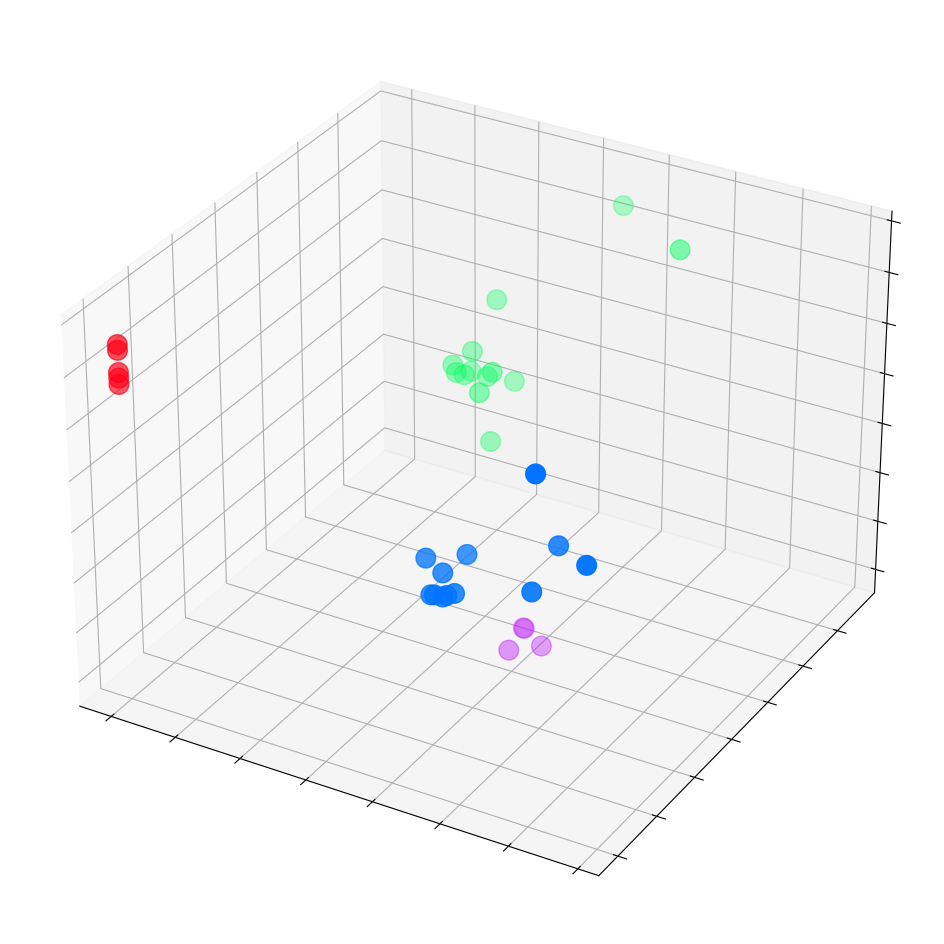

In [66]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
plt.show()

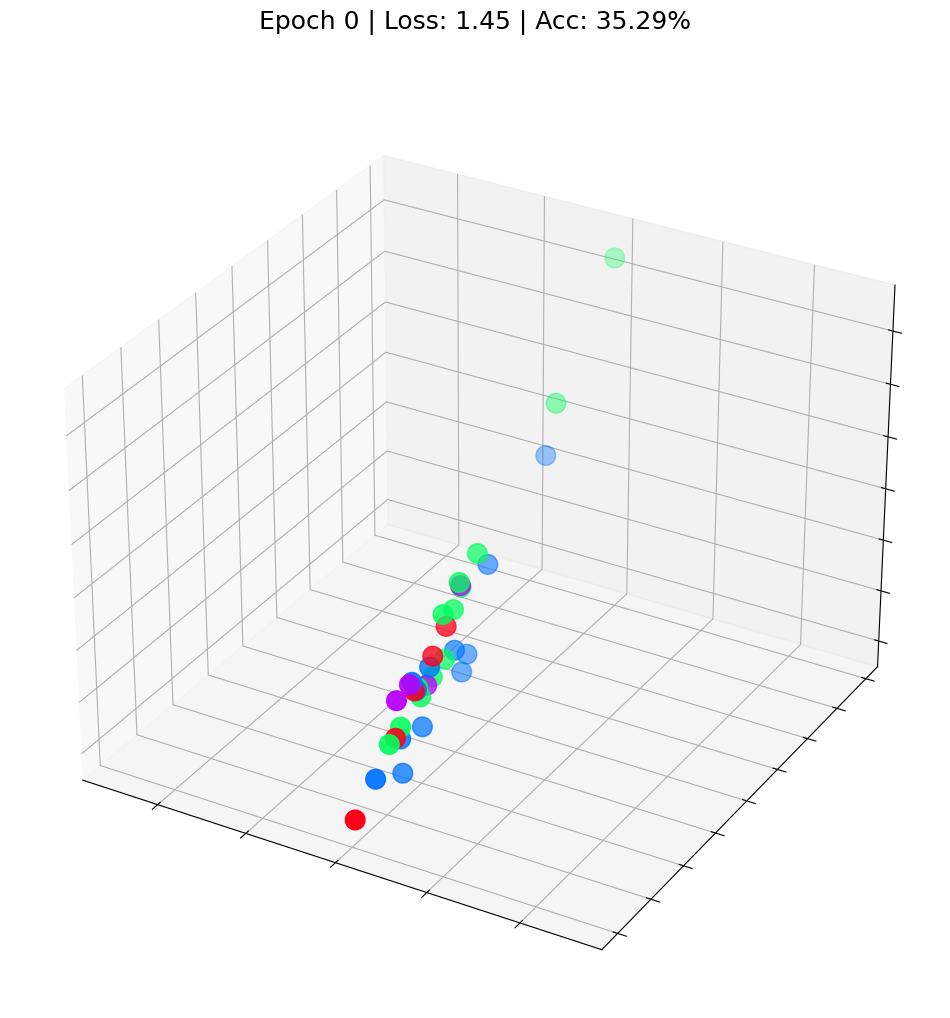

In [87]:
def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())
display(html)